In [6]:
import pandas as pd
import copy
exp = pd.read_csv('/home/yabmtm/Downloads/activity_data.csv')
df = pd.read_pickle('/home/yabmtm/packages/git/covid-FAH-CPU/FEP/dataframes/master_FEP.pkl')
all_df = pd.read_csv("https://covid.postera.ai/covid/submissions.csv")
new_CID_list = list(all_df['CID'])
old_CID_list = list(all_df['CID (old format)'])
old_to_new_CID_dict = {}
for old_CID, new_CID in zip(old_CID_list, new_CID_list):
    old_to_new_CID_dict[old_CID] = new_CID
new_to_old_CID_dict = {v: k for k, v in old_to_new_CID_dict.items()}
def get_new_CID_from_old(old_CID):
    return old_to_new_CID_dict[old_CID]
def get_old_CID_from_new(new_CID):
    return new_to_old_CID_dict[new_CID]

In [32]:
import glob, re
import numpy as np
structures = [re.sub('.*:','',re.sub('.pdb','',i)) for i in glob.glob('/home/yabmtm/Downloads/Mpro_allPdb_04-Jun-2020/*pdb')]
simulated_identities = df.identity.values
simulated_structures = []
for i in structures:
    try:
        old_CID = get_old_CID_from_new(i)
    except Exception as e:
        old_CID = None
    if i in simulated_identities:
        simulated_structures.append(df.loc[df.identity == i].values)
    if old_CID in simulated_identities:
        simulated_structures.append(df.loc[df.identity == old_CID].values)

simulated_structures = np.concatenate(simulated_structures)
print(len(simulated_structures))
out_df = pd.DataFrame(simulated_structures, columns=df.columns)
#out_df.to_pickle('simulated_structures.pkl')
print(out_df)

## writes a pickle of all master_FEP.pkl ligands for which we have a crystal structure

246
         dataset             identity                receptor    score  \
0    MS0406-2_RL       ÁLV-UNI-7ff-47        Mpro-x0426_0.pdb -7.92665   
1     MS0406-2_L       ÁLV-UNI-7ff-47        Mpro-x0426_0.pdb -7.92665   
2      MS0503_RL  LON-WEI-b8d98729-23        Mpro-x0749_0.pdb -7.19064   
3       MS0503_L  LON-WEI-b8d98729-23        Mpro-x0749_0.pdb -7.19064   
4      MS0503_RL  BAR-COM-4e090d3a-47        Mpro-x0678_0.pdb -10.2196   
..           ...                  ...                     ...      ...   
241     MS0326_L       TRY-UNI-714-22  Mpro-x1382-protein.pdb -5.14342   
242    MS0331_RL       TRY-UNI-714-22        Mpro-x0678_0.pdb -11.3494   
243     MS0331_L       TRY-UNI-714-22        Mpro-x0678_0.pdb -11.3494   
244  MS0406-2_RL       TRY-UNI-714-22        Mpro-x0434_0.pdb -11.0903   
245   MS0406-2_L       TRY-UNI-714-22        Mpro-x0434_0.pdb -11.0903   

    v1_project v1_run v2_project v2_run v3_project v3_run project  run  
0        14379   1153      14727  

In [24]:
print(structures)
vince = ['ALV-UNI-7ff1a6f9-47',
'ANN-UNI-26382800-5',
'BAR-COM-4e090d3a-39',
'BAR-COM-4e090d3a-47',
'BAR-COM-4e090d3a-49',
'BAR-COM-4e090d3a-57',
'DAN-LON-a5fc619e-8',
'DAN-PUR-6788a628-2',
'DAR-DIA-23aa0b97-13',
'DAR-DIA-23aa0b97-17',
'DAR-DIA-23aa0b97-20',
'DAR-DIA-842b4336-13',
'DAR-DIA-842b4336-3',
'DAR-DIA-eace69ff-36',
'DAV-CRI-3edb475e-4',
'DUN-NEW-d8381160-1',
'GAB-REV-70cc3ca5-13',
'GAB-REV-70cc3ca5-18',
'GAB-REV-70cc3ca5-8',
'LON-WEI-b8d98729-20',
'LON-WEI-b8d98729-23',
'LON-WEI-b8d98729-43',
'LON-WEI-b8d98729-8',
'MAK-UNK-0d6072ac-4',
'TRY-UNI-714a760b-12',
'TRY-UNI-714a760b-18',
'TRY-UNI-714a760b-20',
'TRY-UNI-714a760b-22',
'TRY-UNI-714a760b-6']
for i in vince:
    if i in structures:
        try:
            old = get_old_CID_from_new(i)
        except Exception as e:
            old = 'lol'
        print('###########################\n',i)
        print('new')
        print(df.loc[df.identity == i])
        print('old')
        print(df.loc[df.identity == old])


['AAR-POS-0daf6b7e-26', 'AAR-POS-0daf6b7e-10', 'ALV-UNI-7ff1a6f9-47', 'AAR-POS-d2a4d1df-11', 'LON-WEI-b8d98729-23', 'AAR-POS-5507155c-2', 'AAR-POS-d2a4d1df-44', 'AAR-POS-d2a4d1df-38', 'AAR-POS-0daf6b7e-31', 'AAR-POS-d2a4d1df-36', 'AAR-POS-0daf6b7e-41', 'AAR-POS-0daf6b7e-23', 'LON-WEI-b8d98729-18', 'AAR-POS-d2a4d1df-43', 'AAR-POS-0daf6b7e-29', 'AAR-POS-d2a4d1df-25', 'BAR-COM-4e090d3a-47', 'AAR-POS-d2a4d1df-10', 'LON-WEI-adc59df6-26', 'AAR-POS-0daf6b7e-40', 'AAR-POS-d2a4d1df-27', 'AAR-POS-0daf6b7e-45', 'AAR-POS-0daf6b7e-6', 'AAR-POS-0daf6b7e-42', 'DUN-NEW-d8381160-1', 'LON-WEI-b8d98729-8', 'DAR-DIA-23aa0b97-20', 'AAR-POS-fca48359-19', 'MAT-POS-916a2c5a-2', 'AAR-POS-0daf6b7e-8', 'BAR-COM-4e090d3a-39', 'AAR-POS-d2a4d1df-31', 'AAR-POS-0daf6b7e-5', 'TRY-UNI-714a760b-20', 'AAR-POS-d2a4d1df-40', 'AAR-POS-f650c5f2-2', 'AAR-POS-0daf6b7e-12', 'AAR-POS-0daf6b7e-25', 'AAR-POS-0daf6b7e-16', 'AAR-POS-d2a4d1df-9', 'AAR-POS-f650c5f2-3', 'AAR-POS-0daf6b7e-39', 'AAR-POS-0daf6b7e-20', 'AAR-POS-d2a4d1df-34

           dataset        identity                receptor    score  \
69591    MS0323_RL  DAR-DIA-842-13        protein-0387.pdb  -4.7216   
70080     MS0323_L  DAR-DIA-842-13        protein-0387.pdb  -4.7216   
72671    MS0326_RL  DAR-DIA-842-13  Mpro-x0434-protein.pdb -6.44037   
72672    MS0326_RL  DAR-DIA-842-13  Mpro-x0678-protein.pdb -11.1811   
72673    MS0326_RL  DAR-DIA-842-13  Mpro-x1093-protein.pdb -7.46103   
78210     MS0326_L  DAR-DIA-842-13  Mpro-x0434-protein.pdb -6.44037   
78211     MS0326_L  DAR-DIA-842-13  Mpro-x0678-protein.pdb -11.1811   
78212     MS0326_L  DAR-DIA-842-13  Mpro-x1093-protein.pdb -7.46103   
81413    MS0331_RL  DAR-DIA-842-13        Mpro-x0678_0.pdb -10.8546   
83677     MS0331_L  DAR-DIA-842-13        Mpro-x0678_0.pdb -10.8546   
86716  MS0406-2_RL  DAR-DIA-842-13        Mpro-x0678_0.pdb -11.1811   
90339   MS0406-2_L  DAR-DIA-842-13        Mpro-x0678_0.pdb -11.1811   

      v1_project v1_run v2_project v2_run v3_project v3_run project  run  
6

           dataset        identity                receptor    score  \
73357    MS0326_RL  TRY-UNI-714-22  Mpro-x0107-protein.pdb -10.6166   
73358    MS0326_RL  TRY-UNI-714-22  Mpro-x0434-protein.pdb -7.33984   
73359    MS0326_RL  TRY-UNI-714-22  Mpro-x0678-protein.pdb -11.0903   
73360    MS0326_RL  TRY-UNI-714-22  Mpro-x1382-protein.pdb -5.14342   
78896     MS0326_L  TRY-UNI-714-22  Mpro-x0107-protein.pdb -10.6166   
78897     MS0326_L  TRY-UNI-714-22  Mpro-x0434-protein.pdb -7.33984   
78898     MS0326_L  TRY-UNI-714-22  Mpro-x0678-protein.pdb -11.0903   
78899     MS0326_L  TRY-UNI-714-22  Mpro-x1382-protein.pdb -5.14342   
81352    MS0331_RL  TRY-UNI-714-22        Mpro-x0678_0.pdb -11.3494   
83616     MS0331_L  TRY-UNI-714-22        Mpro-x0678_0.pdb -11.3494   
86726  MS0406-2_RL  TRY-UNI-714-22        Mpro-x0434_0.pdb -11.0903   
90349   MS0406-2_L  TRY-UNI-714-22        Mpro-x0434_0.pdb -11.0903   

      v1_project v1_run v2_project v2_run v3_project v3_run project  run  
7

In [15]:
good = out_df.loc[(out_df.dataset != 'MS0503_RL') & (out_df.dataset.str.contains(
'_RL'))]
ligands = list(set(good.identity.values))
for i in ligands:
    info = good.loc[(good.identity == i) & (good.dataset == 'MS0406-2_RL')]
    print(i, info.v3_project.values[0], info.v3_run.values[0])

DAR-DIA-842-13 14827 106
DUN-NEW-d83-1 14827 1162
BAR-COM-4e0-47 14827 1379
ANN-UNI-263-5 14827 211
TRY-UNI-714-20 14827 202
TRY-UNI-714-18 14827 110
ÁLV-UNI-7ff-47 14827 1153
DAN-LON-a5f-8 14827 1975
GAB-REV-70c-13 14827 371
TRY-UNI-714-6 14827 248
BAR-COM-4e0-49 14827 1573
BAR-COM-4e0-57 14827 1921
DAR-DIA-23a-20 14827 212
DAR-DIA-842-3 14827 337
TRY-UNI-714-22 14827 116
DAR-DIA-23a-17 14827 297
BAR-COM-4e0-39 14827 1712
TRY-UNI-714-12 14827 416
DAR-DIA-23a-13 14827 438
GAB-REV-70c-8 14827 521


In [3]:
proj_run = []
for i in simulated_structures:
    if i[4]:
        proj_run.append([i[4],i[5]])
    if i[6]:
        proj_run.append([i[6],i[7]])
    if i[8]:
        proj_run.append([i[8],i[9]])

In [6]:
vav15 = ['vav15',14723,14823,14724,14824,14365,14367,14369,14371]
vav16 = ['vav16',14722,14822,14725,14825,14752,14852,14727,14827,14728,14828,14363,14366,14368,14370]
fah5 = ['fah5',14375]
avast2 = ['avast2',14377,14379]
for i in [vav15,vav16,fah5,avast2]:
    print(i[0])
    ws_projects = []
    for j in proj_run:
        if j[0] in i:
            ws_projects.append(j)
    print(ws_projects)
    print()
        

vav15
[[14367, 973], [14724, 973], [14824, 973], [14371, 973], [14365, 770], [14723, 770], [14823, 770], [14365, 771], [14723, 771], [14823, 771], [14369, 770], [14369, 771], [14724, 1743], [14824, 1743], [14724, 1744], [14824, 1744], [14724, 1745], [14824, 1745], [14724, 1746], [14824, 1746], [14724, 1747], [14824, 1747], [14724, 1748], [14824, 1748], [14367, 965], [14724, 965], [14824, 965], [14371, 965], [14367, 203], [14724, 203], [14824, 203], [14367, 204], [14724, 204], [14824, 204], [14367, 205], [14724, 205], [14824, 205], [14367, 206], [14724, 206], [14824, 206], [14371, 203], [14371, 204], [14371, 205], [14371, 206], [14723, 2525], [14823, 2525], [14723, 2526], [14823, 2526], [14723, 2527], [14823, 2527], [14367, 983], [14724, 983], [14824, 983], [14371, 983], [14724, 1701], [14824, 1701], [14724, 1702], [14824, 1702], [14724, 1703], [14824, 1703], [14724, 1704], [14824, 1704], [14724, 1705], [14824, 1705], [14724, 1706], [14824, 1706], [14724, 1586], [14824, 1586], [14724, 1

In [36]:
a = range(0,250001,25000)
print(a.index(75000))

3


In [69]:
import sys, subprocess, re, tqdm, os
import mdtraj as md
xtc_frames = range(0,250001,25000) # 0, traj_frames+1, nstxout-compressed
#for i in tqdm.tqdm(glob.glob('../crystal_analysis/*')):
for i in tqdm.tqdm(glob.glob('../crystal_analysis/14824_1591')):# for each project_run directory of data
    run = re.sub('.*sis.*_','',i) # extract RUN number
    if not os.path.exists(f'{i}/setup/xtc.gro'): # skip if no gro file for the xtc
        continue
    try:
        if glob.glob(f'{i}/unbiased_frames/*gro')[0]:
            continue
    except Exception as e:
        print(i, e)
        pass
    if not os.path.exists(f'{i}/unbiased_frames'):
        os.makedirs(f'{i}/unbiased_frames')
    
    for clone in tqdm.tqdm(range(len(sorted(glob.glob(f'{i}/RUN{run}/CLONE*'))))):
        for results in range(len(glob.glob(f'{i}/RUN{run}/CLONE{clone}/results[0-9]*'))):

            cmd = f'cat {i}/RUN{run}/CLONE{clone}/results{results}/md.log | grep -B5 "1  0.000  0.000  0.000  .* <<"'
            try: # parse md.log for each clone/gen for ALL unbiased frames
                unbiased_frames = subprocess.check_output(cmd, shell=True).decode().split('\n')[::7]
                unbiased_frames = [int(x.split()[0]) for x in unbiased_frames]
            except Exception as e:
                continue
            for n in unbiased_frames:
                if n%25000 == 0: # save frames that match xtc frames (nstxout-compressed)
                    try: # determine which frame index it is, load traj, save gro
                        frame = xtc_frames.index(n) # determine which frame index it is
                        traj = md.load(f'{i}/RUN{run}/CLONE{clone}/results{results}/traj_comp.xtc',top=f'{i}/setup/xtc.gro')
                        traj[frame].save_gro(f'{i}/unbiased_frames/C{clone}_G{results}_F{frame}.gro')
                    except Exception as e:
                        print(f'Failure to load/save for {i}/setup/xtc.gro',e)
                        break
    #sys.exit()
        

  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_150 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_197 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_198 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_211 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_212 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_213 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_214 list index out of range



  0%|          | 0/10 [00:00<?, ?it/s]

../crystal_analysis/14367_975 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_211 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_212 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_213 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_214 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_975 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_147 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_148 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_149 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_150 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_147 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_148 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_149 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_150 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_196 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_197 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14724_198 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_196 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_197 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_198 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_211 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_212 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_213 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_214 list index out of range



  0%|          | 0/5 [00:00<?, ?it/s]

../crystal_analysis/14824_975 list index out of range



100%|██████████| 176/176 [28:53<00:00,  9.85s/it]


In [41]:
import sys, subprocess, re, tqdm, os, itertools
import mdtraj as md
vav15_projects = [[14367, 973], [14724, 973], [14824, 973], [14371, 973], [14365, 770], [14723, 770], [14823, 770], [14365, 771], [14723, 771], [14823, 771], [14369, 770], [14369, 771], [14724, 1743], [14824, 1743], [14724, 1744], [14824, 1744], [14724, 1745], [14824, 1745], [14724, 1746], [14824, 1746], [14724, 1747], [14824, 1747], [14724, 1748], [14824, 1748], [14367, 965], [14724, 965], [14824, 965], [14371, 965], [14367, 203], [14724, 203], [14824, 203], [14367, 204], [14724, 204], [14824, 204], [14367, 205], [14724, 205], [14824, 205], [14367, 206], [14724, 206], [14824, 206], [14371, 203], [14371, 204], [14371, 205], [14371, 206], [14723, 2525], [14823, 2525], [14723, 2526], [14823, 2526], [14723, 2527], [14823, 2527], [14367, 983], [14724, 983], [14824, 983], [14371, 983], [14724, 1701], [14824, 1701], [14724, 1702], [14824, 1702], [14724, 1703], [14824, 1703], [14724, 1704], [14824, 1704], [14724, 1705], [14824, 1705], [14724, 1706], [14824, 1706], [14724, 1586], [14824, 1586], [14724, 1587], [14824, 1587], [14724, 1588], [14824, 1588], [14724, 1589], [14824, 1589], [14724, 1590], [14824, 1590], [14724, 1591], [14824, 1591], [14723, 2194], [14823, 2194], [14723, 2495], [14823, 2495], [14723, 2496], [14823, 2496], [14723, 2497], [14823, 2497], [14367, 292], [14724, 292], [14824, 292], [14371, 292], [14724, 1725], [14824, 1725], [14724, 1726], [14824, 1726], [14724, 1727], [14824, 1727], [14724, 1728], [14824, 1728], [14724, 1729], [14824, 1729], [14724, 1730], [14824, 1730], [14367, 171], [14724, 171], [14824, 171], [14367, 172], [14724, 172], [14824, 172], [14367, 173], [14724, 173], [14824, 173], [14367, 174], [14724, 174], [14824, 174], [14371, 171], [14371, 172], [14371, 173], [14371, 174], [14367, 298], [14724, 298], [14824, 298], [14371, 298], [14367, 195], [14724, 195], [14824, 195], [14367, 196], [14724, 196], [14824, 196], [14367, 197], [14724, 197], [14824, 197], [14367, 198], [14724, 198], [14824, 198], [14371, 195], [14371, 196], [14371, 197], [14371, 198], [14367, 147], [14724, 147], [14824, 147], [14367, 148], [14724, 148], [14824, 148], [14367, 149], [14724, 149], [14824, 149], [14367, 150], [14724, 150], [14824, 150], [14371, 147], [14371, 148], [14371, 149], [14371, 150], [14367, 975], [14724, 975], [14824, 975], [14371, 975], [14367, 211], [14724, 211], [14824, 211], [14367, 212], [14724, 212], [14824, 212], [14367, 213], [14724, 213], [14824, 213], [14367, 214], [14724, 214], [14824, 214], [14371, 211], [14371, 212], [14371, 213], [14371, 214]]
identities = []
sorted_structures = []
for x,i in enumerate([[14824_1591]]): #vav15_projects): @@@@@@@@@@@@@@@@@@@@@@@
    for version in ['v1','v2','v3']:
        if i[0] in df[f'{version}_project'].values: # for each project, get version/identity
            identity = df.loc[(df[f'{version}_project'] == i[0]) & (df[f'{version}_run'] == i[1])].identity.values[0]
            try:
                identity = get_new_CID_from_old(identity)
            except Exception as e:
                pass
            identities.append(identity)
            vav15_projects[x].append(identity)
            break
for i in tqdm.tqdm(set(identities)): # for each structure, load crystal and unbiased samples
    crystal = glob.glob(f'/home/yabmtm/Downloads/Mpro_allPdb_04-Jun-2020/*{i}*pdb')[0]
    samples = []
    for j in vav15_projects:
        if i == j[-1]:
            unbiased_frames = glob.glob(f'../crystal_analysis/{"_".join([str(x) for x in j[:2]])}/unbiased_frames/*gro')
            if not unbiased_frames:
                continue
            samples.append(unbiased_frames)
    if not samples:
        continue
    samples = [x for y in samples for x in y]
    loaded_sample = md.load(samples[0])
    loaded_crystal = md.load(crystal)
    # gro res ndx = pdb res ndx + 1
    # define a list of pocket residues to featurize and compute/save distances
    res_ndx_pdb = list(range(38,51)) + list(range(135,148)) + list(range(162,175)) + list(range(185,192))
    res_ndx_gro = [x + 1 for x in res_ndx_pdb]
    receptor_indices = [a.index for a in loaded_sample.topology.atoms if a.residue.index in res_ndx_gro and a.name in ['O1','O2','N2','CB','CG','N1','S']]
    xreceptor_indices = [a.index for a in loaded_crystal.topology.atoms if a.residue.index in res_ndx_pdb and a.name in ['O1','O2','N2','CB','CG','N1','S']]
    ligand_indices = [a.index for a in loaded_sample.topology.atoms if a.residue.name == 'LIG' and a.element.symbol in ['N','O','S']]
    xligand_indices = [a.index for a in loaded_crystal.topology.atoms if a.residue.name == 'LIG' and a.element.symbol in ['N','O','S']]
    #print(len(receptor_indices),len(xreceptor_indices),len(ligand_indices),len(xligand_indices))
    pairs = list(itertools.combinations(receptor_indices[::2] + ligand_indices, 2))
    xpairs = list(itertools.combinations(xreceptor_indices[::2] + xligand_indices, 2))
    loaded_samples = [md.load(x) for x in samples]
    distances = []
    for x,j in enumerate(loaded_samples):
        distances.append(md.compute_distances(j, pairs))
    distances.append(md.compute_distances(loaded_crystal, xpairs))
    np.save(f'{i}_distances.npy',distances)


100%|██████████| 19/19 [07:05<00:00, 22.38s/it]


In [60]:
results = pd.read_pickle('/yggdrasil/FEP_analysis/results/master_results_WL1.0_080220.pkl')
data = []
for i in set(identities):
    try:
        feb = results.loc[results.identity == get_old_CID_from_new(i)].febkT.values[0]
        for j in vav15_projects:
            if i == j[-1]:
                dir = glob.glob(f'../crystal_analysis/{"_".join([str(x) for x in j[:2]])}')[0]
        data.append([i,feb,dir])
    except Exception as e:
        continue
data.sort(key = lambda x: x[1])
for i in data:
    print(i)

['TRY-UNI-714a760b-12', -9.38818009522693, '../crystal_analysis/14371_174']
['TRY-UNI-714a760b-6', -8.07793697490284, '../crystal_analysis/14371_150']
['ANN-UNI-26382800-5', -7.690436206428984, '../crystal_analysis/14824_1591']
['TRY-UNI-714a760b-18', -7.646615018600585, '../crystal_analysis/14371_198']
['TRY-UNI-714a760b-20', -7.09265440714065, '../crystal_analysis/14371_206']
['BAR-COM-4e090d3a-39', -6.838304640404033, '../crystal_analysis/14371_965']
['DAR-DIA-23aa0b97-17', -6.338532660349642, '../crystal_analysis/14824_1730']
['DAR-DIA-842b4336-13', -5.476005966092501, '../crystal_analysis/14823_2527']
['GAB-REV-70cc3ca5-13', -5.371878754081649, '../crystal_analysis/14371_298']
['DAR-DIA-23aa0b97-20', -4.587000128979593, '../crystal_analysis/14824_1748']
['DAR-DIA-23aa0b97-13', -4.412061475001661, '../crystal_analysis/14824_1706']
['TRY-UNI-714a760b-22', -4.3994461275771926, '../crystal_analysis/14371_214']
['DAR-DIA-842b4336-3', -3.2663240539724114, '../crystal_analysis/14823_2497

In [56]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
data = np.load('<mdtraj.Trajectory with 1 frames, 4682 atoms, 307 residues, and unitcells>_distances.npy')
frames =[]
for i in range(len(data)):
    frames.append(data[i][0])
print(np.shape(frames))
pca_obj = coor.pca(frames, dim=8)
Y = pca_obj.get_output() # get pca coordinates
print('number of trajectories = ', np.shape(Y)[0])
print('number of frames = ', np.shape(Y)[1])
print('number of dimensions = ',np.shape(Y)[2])
print(np.shape(Y))

(429, 630)


number of trajectories =  429
number of frames =  630
number of dimensions =  8
(429, 630, 8)


In [76]:
traj = md.load('/yggdrasil/trajdata-PROJ14824-RUN1591/RUN1591/c0.cluster.xtc',
               top='/yggdrasil/trajdata-PROJ14824-RUN1591/RUN1591/Protein_LIG.cluster.gro')
trajs = []
for g in range(len(glob.glob('/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/RUN1591/CLONE0/results[0-9]*'))):
    try:
        trajs.append(md.load(f'/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/RUN1591/CLONE0/results{g}/traj_comp.xtc',
                     top=f'/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/setup/xtc.gro'))
    except Exception as e:
        pass
print(len(traj))
print([len(x) for x in trajs])

1287
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [85]:
clone=0
for i in glob.glob('/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/*C0_*gro'):
    print(i)
    gen = re.sub('.*C0_G','',re.sub('_F[0-9]*.gro','',i))
    frame = re.sub('.*_G[0-9]*_F','',re.sub('.gro','',i))
    cat_frame = 11*int(gen) + int(frame)
    traj[cat_frame].save_gro(f'/yggdrasil/trajdata-PROJ14824-RUN1591/unbiased_frames/C{clone}_G{gen}_F{frame}.gro')

/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G103_F1.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G103_F2.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G107_F1.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G113_F5.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G12_F8.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G17_F7.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G23_F1.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G23_F9.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G24_F6.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G31_F3.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G32_F9.gro
/yggdrasil/FEP_analysis/crystal_analysis/14824_1591/unbiased_frames/C0_G39_F1.gro
/yggdrasil/F

In [87]:
    samples = glob.glob('/yggdrasil/trajdata-PROJ14824-RUN1591/unbiased_frames/*gro')
    crystal = '/yggdrasil/trajdata-PROJ14824-RUN1591/crystal.gro'
    loaded_sample = md.load(samples[0])
    loaded_crystal = md.load(crystal)
    # gro res ndx = pdb res ndx + 1
    # define a list of pocket residues to featurize and compute/save distances
    res_ndx_pdb = list(range(38,51)) + list(range(135,148)) + list(range(162,175)) + list(range(185,192))
    res_ndx_gro = [x + 1 for x in res_ndx_pdb]
    receptor_indices = [a.index for a in loaded_sample.topology.atoms if a.residue.index in res_ndx_gro and a.name in ['O1','O2','N2','CB','CG','N1','S']]
    xreceptor_indices = [a.index for a in loaded_crystal.topology.atoms if a.residue.index in res_ndx_pdb and a.name in ['O1','O2','N2','CB','CG','N1','S']]
    ligand_indices = [a.index for a in loaded_sample.topology.atoms if a.residue.name == 'LIG' and a.element.symbol in ['N','O','S']]
    xligand_indices = [a.index for a in loaded_crystal.topology.atoms if a.residue.name == 'LIG' and a.element.symbol in ['N','O','S']]
    print(len(receptor_indices),len(xreceptor_indices),len(ligand_indices),len(xligand_indices))
    pairs = list(itertools.combinations(receptor_indices[::2] + ligand_indices, 2))
    xpairs = list(itertools.combinations(xreceptor_indices[::2] + xligand_indices, 2))
    loaded_samples = [md.load(x) for x in samples]
    distances = []
    for x,j in enumerate(loaded_samples):
        distances.append(md.compute_distances(j, pairs))
    distances.append(md.compute_distances(loaded_crystal, xpairs))
    print(np.shape(distances))
    np.save('/yggdrasil/trajdata-PROJ14824-RUN1591/distances.npy',distances)

64 64 4 4
(29, 1, 630)


(29, 630)
(1, 29, 630)


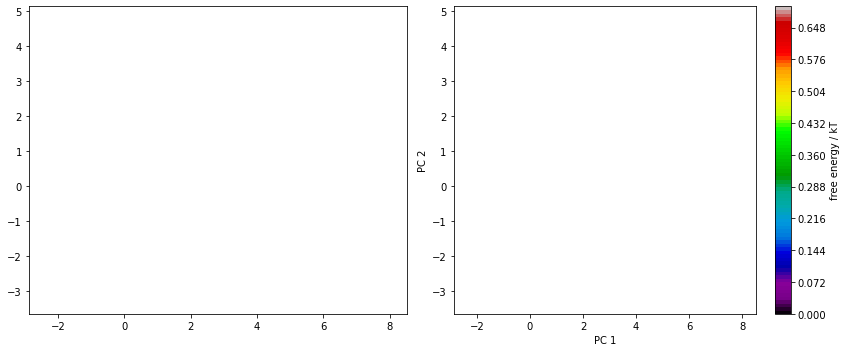

In [94]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib.pyplot as plt
%matplotlib inline
data = np.load('/yggdrasil/trajdata-PROJ14824-RUN1591/distances.npy')
print(np.shape(np.concatenate(data)))
frames = []
for i in range(len(data)):
    frames.append(data[i][0])
frames = [frames]
print(np.shape(frames))
pca = coor.pca(frames, dim=8)
pca_concatenated = np.concatenate(pca.get_output())
fig, axes = plt.subplots(1, 2, figsize=(12,5))
pyemma.plots.plot_density(*pca_concatenated[:, :2].T, ax=axes[0], cbar=False, logscale=True)
pyemma.plots.plot_free_energy(*pca_concatenated[:, :2].T, ax=axes[1], legacy=False)
for ax in axes.flat[1:]:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
fig.tight_layout()

In [98]:
import pandas as pd
df = pd.read_pickle('/home/yabmtm/packages/git/covid-FAH-CPU/FEP/dataframes/master_FEP.pkl')
lig = get_old_CID_from_new('ANN-UNI-26382800-5')
lig_data = df.loc[df.identity == lig].values

[['MS0323_RL' 'ANN-UNI-263-5' 'protein-0387.pdb' -4.88376092910767 14363
  372 14722 372 14822 372 nan nan]
 ['MS0323_L' 'ANN-UNI-263-5' 'protein-0387.pdb' -4.88376092910767 14364
  372 None None None None nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x0104-protein.pdb' -8.423388 14368 86
  14724 1586 14824 1586 nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x0305-protein.pdb' -3.094506 14368 87
  14724 1587 14824 1587 nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x0434-protein.pdb' -6.889636 14368 88
  14724 1588 14824 1588 nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x0678-protein.pdb' -10.529879 14368
  89 14724 1589 14824 1589 nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x1093-protein.pdb' -8.117079 14368 90
  14724 1590 14824 1590 nan nan]
 ['MS0326_RL' 'ANN-UNI-263-5' 'Mpro-x1249-protein.pdb' -4.536527 14368 91
  14724 1591 14824 1591 nan nan]
 ['MS0326_L' 'ANN-UNI-263-5' 'Mpro-x0104-protein.pdb' -8.423388 14372 86
  None None None None nan nan]
 ['MS0326_L' 'ANN-UNI-263-5' 'Mpro-x03

In [4]:
import re,glob,math # look at r_inhibition at 50_uM for all non-covalent crystal structures
import pandas as pd
structures = [re.sub('.*:','',re.sub('.pdb','',i)) for i in glob.glob('/home/yabmtm/Downloads/Mpro_allPdb_04-Jun-2020/*pdb')]
activity_data = pd.read_csv('/home/yabmtm/Downloads/activity_data.csv')
non_covalent_data = pd.read_csv('~/covid_submissions_all_info-noncovalent.csv')
print(non_covalent_data)
data = []
for i in structures:
    try:
        r_inhibition_at_50_uM = activity_data.loc[activity_data.CID == i].r_inhibition_at_50_uM.values[0]
        if not math.isnan(r_inhibition_at_50_uM):
            if not non_covalent_data.loc[non_covalent_data.TITLE == i].is_covalent.values[0]:
                data.append([i,r_inhibition_at_50_uM])
    except Exception as e:
        continue
data.sort(key = lambda x: x[1])
for i in data:
    print(i)

                                               SMILES                TITLE  \
0                               c1ccnc(c1)C2(CCCC2)CO  AAR-POS-0daf6b7e-22   
1                       Cn1ccc(n1)C(=O)NC[C@@H]2CCCO2  AAR-POS-0daf6b7e-23   
2                                     C1C(CS1(=O)=O)O  AAR-POS-0daf6b7e-24   
3                     c1ccc(c(c1)CNc2[nH]c3ccccc3n2)O  AAR-POS-0daf6b7e-25   
4                               CC1C(CCCN1Cc2ccccc2)O  AAR-POS-0daf6b7e-26   
...                                               ...                  ...   
3843           CS(=O)(=O)NCCC(C1CCCCC1)C(=O)Nc2cccnc2   ZAC-WAB-3baddbb3-1   
3844  CS(=O)(=O)NCCC(C1CCCCC1)C(=O)CCc2c[nH]c3c2cccn3   ZAC-WAB-86e8bacf-1   
3845                   c1ccc(cc1)C(=O)NC(=O)NC2CCCCC2   ZAC-WAB-b0242612-1   
3846   CS(=O)(=O)NCCC(C1CCCCC1)C(=O)Cc2c[nH]c3c2cccn3   ZAC-WAB-d55a3c2e-1   
3847           CS(=O)(=O)NCCC(C1CCCCC1)C(=O)Nc2cccnc2   ZAC-WAB-d55a3c2e-2   

      is_covalent  
0           False  
1           False  
2  

In [8]:
# which are simulated?
df = pd.read_pickle('/home/yabmtm/packages/git/covid-FAH-analysis/FEP_data/master_FEP.pkl')
results = pd.read_pickle('/home/yabmtm/packages/git/covid-FAH-analysis/FEP_data/master_results_WL1.0_080220.pkl')
for i in data:
    print(i[0], i[1])
    sim_info = df.loc[df.identity == get_old_CID_from_new(i[0])].values
    print(results.loc[results.identity == i[0]])
    for i in sim_info:
        if i[8]:
            print([i[0],i[6],i[7],i[8],i[9]])


GAB-REV-70cc3ca5-8 -0.449359762613582
Empty DataFrame
Columns: [dataset, fah, identity, receptor, score, febkT, error, ns_RL, ns_L, wl_RL, L_error, RL_error]
Index: []
['MS0326_RL', 14724, 292, 14824, 292]
['MS0331_RL', 14725, 203, 14825, 203]
['MS0406-2_RL', 14727, 521, 14827, 521]
BAR-COM-4e090d3a-47 0.0
Empty DataFrame
Columns: [dataset, fah, identity, receptor, score, febkT, error, ns_RL, ns_L, wl_RL, L_error, RL_error]
Index: []
['MS0326_RL', 14724, 973, 14824, 973]
['MS0331_RL', 14725, 841, 14825, 841]
['MS0406-2_RL', 14727, 1379, 14827, 1379]
DUN-NEW-d8381160-1 0.0
Empty DataFrame
Columns: [dataset, fah, identity, receptor, score, febkT, error, ns_RL, ns_L, wl_RL, L_error, RL_error]
Index: []
['MS0323_RL', 14722, 222, 14822, 222]
['MS0323_RL', 14722, 257, 14822, 257]
['MS0326_RL', 14723, 770, 14823, 770]
['MS0326_RL', 14723, 771, 14823, 771]
['MS0406-2_RL', 14727, 1162, 14827, 1162]
BAR-COM-4e090d3a-57 0.0
Empty DataFrame
Columns: [dataset, fah, identity, receptor, score, febkT,